In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_tr = pd.read_csv(r'C:\Users\נעמיה\fashion-mnist_train.csv')
df_te = pd.read_csv(r'C:\Users\נעמיה\fashion-mnist_test.csv')

In [3]:
dictionary = {
    0 :'T-shirt',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

# Getting the values from the dictionary
class_names = list(dictionary.values())

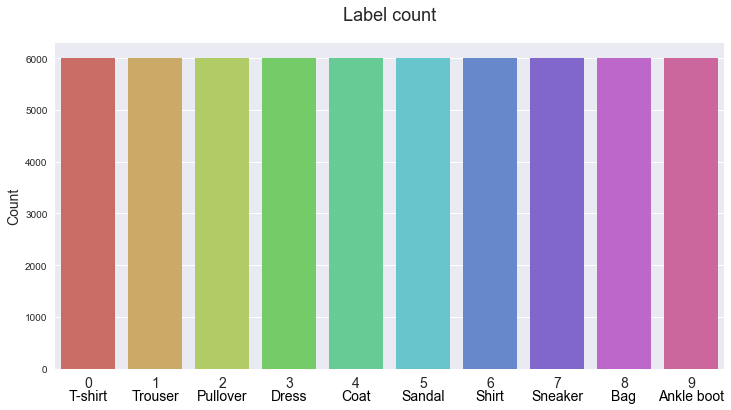

In [5]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1, figsize = (12,6))
sns.countplot(x='label', data = df_tr, ax = ax,palette="hls")

for i, counter in zip(ax.patches, range(0,10)):
        ax.text(x = i.get_x() + i.get_width()/2, y = -600,
                s = f"{class_names[counter]}",
                ha = 'center', size = 14, rotation = 0, color = 'black')

ax.set_title('Label count', fontsize = 18, y = 1.05)
ax.set_xticklabels(list(range(0,10)), fontsize = 14)
ax.set_xlabel(None)
ax.set_ylabel('Count', fontsize = 14);


Text(0.5, 1.05, 'First 30 images of Fashion MNIST')

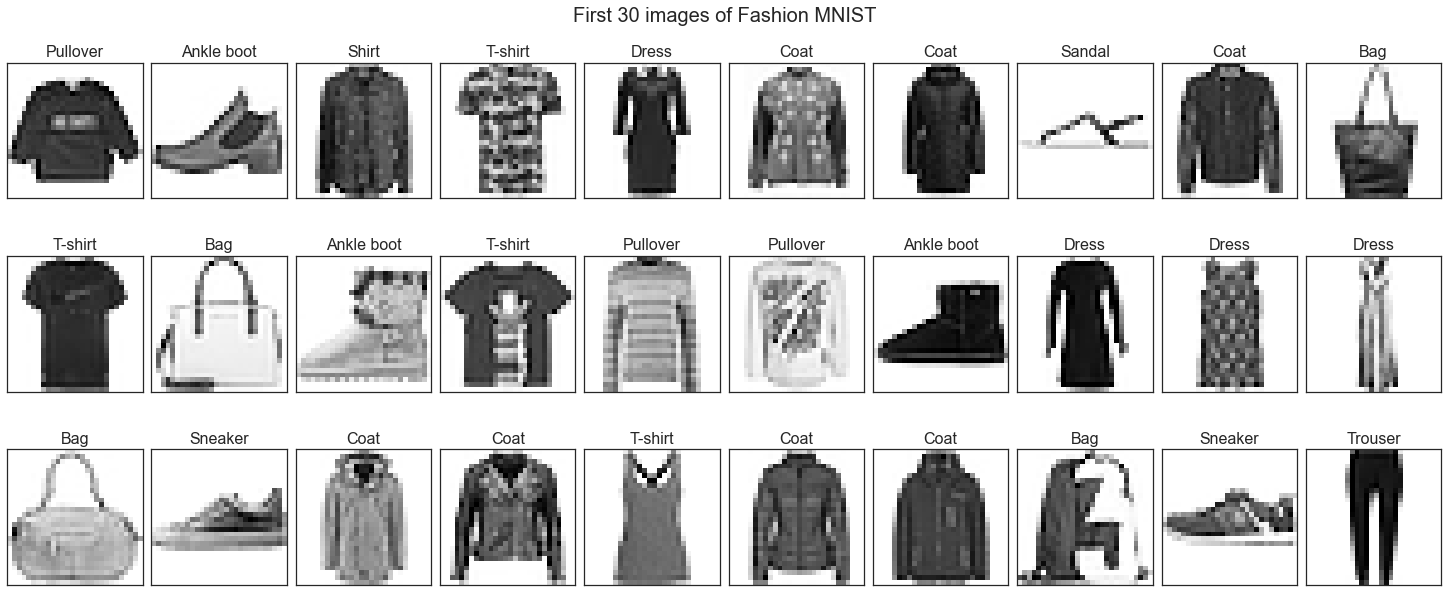

In [8]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(3,10, figsize = (20,8), constrained_layout = True)

for i, axis in zip(range(0,30), ax.ravel()):
    img = np.reshape(df_tr.iloc[i, 1:].values, (28,28))
    axis.imshow(img)
    title = dictionary[df_tr.iloc[i,0]]
    axis.set_title(title, fontsize = 16)
    axis.set_xticklabels("")
    axis.set_yticklabels("")
    
fig.suptitle('First 30 images of Fashion MNIST', size = 20, y=1.05)


In [9]:
x_train = np.array(df_tr.iloc[:,1:])
y_train = np.array(df_tr.iloc[:,0])
x_test = np.array(df_te.iloc[:,1:])
y_test = np.array(df_te.iloc[:,0])
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 25, max_depth = 12, random_state = 2)
rf.fit(x_train, y_train)
rfpred = rf.predict(x_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
df_cm=confusion_matrix(y_test, rfpred,normalize='true')

Text(0.5, 1.05, 'Random forest - Confusion matrix')

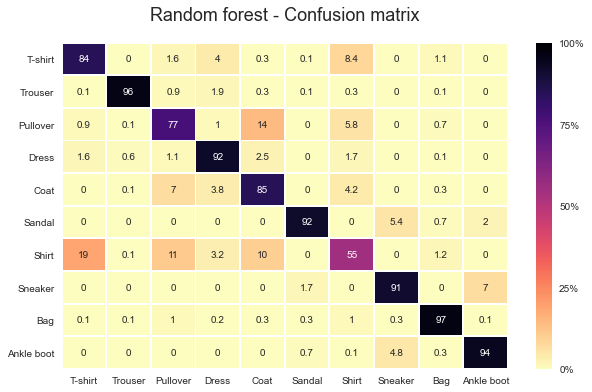

In [12]:
plt.figure(figsize = (10,6))
sns.heatmap(df_cm*100, annot=True,xticklabels=class_names,yticklabels=class_names ,linewidths=.9,cmap="magma_r",
           cbar_kws={'format': '%.0f%%', 'ticks': [0, 25,50,75,100]},
            vmax=100,vmin=0)
sns.set(font_scale=1.4)
plt.title('Random forest - Confusion matrix', fontsize = 18, y = 1.05)

In [13]:
print(classification_report(y_test, rfpred))


              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.77      0.77      1000
           3       0.87      0.92      0.89      1000
           4       0.75      0.85      0.80      1000
           5       0.97      0.92      0.94      1000
           6       0.72      0.55      0.63      1000
           7       0.90      0.91      0.90      1000
           8       0.96      0.97      0.96      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [14]:

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=2000)
logReg.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [15]:
prediction_test  = logReg.predict(x_test)


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
prediction_train = logReg.predict(x_train)
print(accuracy_score(y_train, prediction_train))

0.8806


In [17]:
df_cnm=confusion_matrix(y_test, prediction_test,normalize='true')

Text(0.5, 1.05, 'Logistic regression - Confusion matrix')

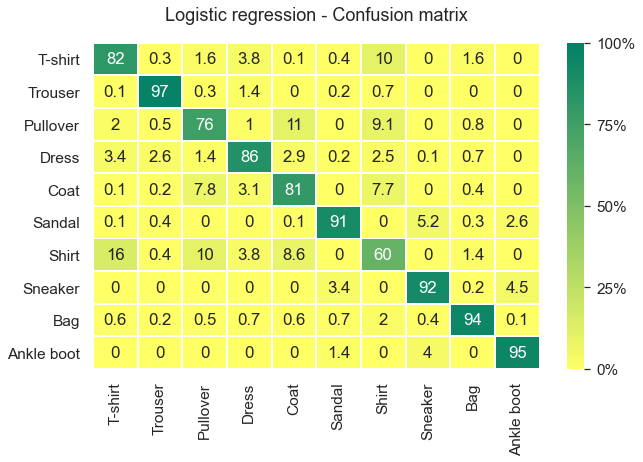

In [18]:
plt.figure(figsize = (10,6))
sns.heatmap(df_cnm*100, annot=True,xticklabels=class_names,yticklabels=class_names ,linewidths=.9,cmap="summer_r",
           cbar_kws={'format': '%.0f%%', 'ticks': [0, 25,50,75,100]},
            vmax=100,vmin=0)
sns.set(font_scale=1.2)
plt.title('Logistic regression - Confusion matrix', fontsize = 18, y = 1.05)

In [19]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.95      0.97      0.96      1000
           2       0.77      0.76      0.77      1000
           3       0.86      0.86      0.86      1000
           4       0.78      0.81      0.79      1000
           5       0.94      0.91      0.92      1000
           6       0.65      0.60      0.62      1000
           7       0.90      0.92      0.91      1000
           8       0.95      0.94      0.94      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
prediction_test  = knn.predict(x_test)
df_cnm=confusion_matrix(y_test, prediction_test,normalize='true')


Text(0.5, 1.05, 'KNN - Confusion matrix')

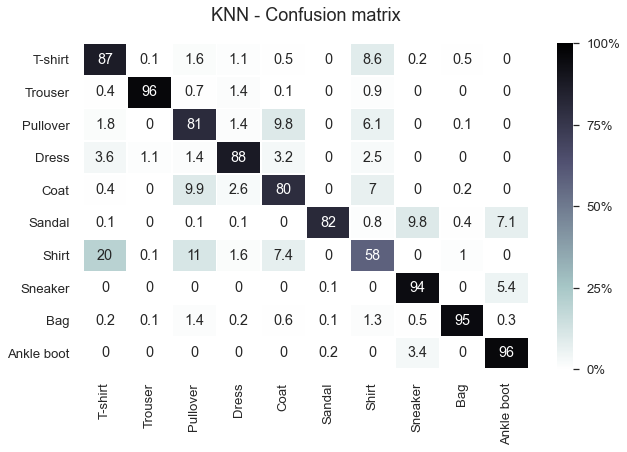

In [33]:
plt.figure(figsize = (10,6))
sns.heatmap(df_cnm*100, annot=True,xticklabels=class_names,yticklabels=class_names ,linewidths=.9,cmap="bone_r",
           cbar_kws={'format': '%.0f%%', 'ticks': [0, 25,50,75,100]},
            vmax=100,vmin=0)
sns.set(font_scale=1.2)
plt.title('KNN - Confusion matrix', fontsize = 18, y = 1.05)